In [1]:
import numpy as np
import matplotlib 
from morpheus.classifier import Classifier
from morpheus.data import example
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h, j, v, z = example.get_sample()
#classified = Classifier.classify(h=h, j=j, v=v, z=z)

0.55656344


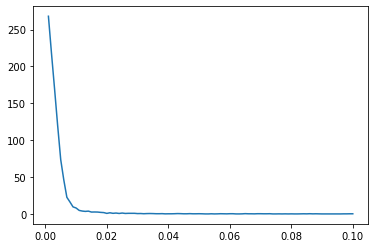

In [9]:
h.shape
print(np.max(h))
hist,edges=np.histogram(h,bins=100,density=True,range=(0,0.1))
plt.plot(edges[1:],hist)

In [2]:

hdul = fits.open("/net/diva/scratch-ssd1/mhuertas/data/CEERS/ceers5_f150w_i2d.fits.gz")

In [3]:
image =  hdul[1].data

In [15]:
print(hdul[1].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                10500                                                  NAXIS2  =                 5000                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               EXTNAME = 'SCI     '           / extension name                                                                                                                         JWST ephemeris information                                                                                                                              REFFRAME= 'EME2000 '           / Ephemeris reference frame                      BUNIT   = 'MJy/sr  '           / physica

503.31586
-1.4790208
(5000, 10500)


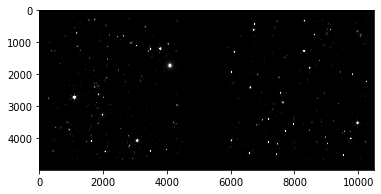

In [26]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray',vmin=0, vmax=1)
print(np.max(image/hdul[1].header['PHOTMJSR']))
print(np.min(image/hdul[1].header['PHOTMJSR']))
print(image.shape)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


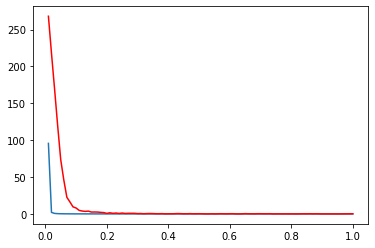

In [12]:
hist_nircam,edges=np.histogram(image/hdul[1].header['PHOTMJSR'],bins=100,density=True,range=(0,1))
plt.plot(edges[1:],hist_nircam)
plt.plot(edges[1:],hist,color='red')
print(edges)

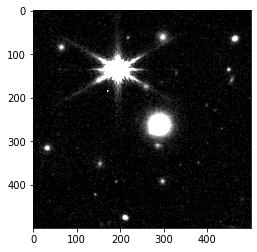

In [5]:
image_electrons = image/hdul[1].header['PHOTMJSR']
test = image_electrons[1000:1500,1000:1500]
plt.imshow(test, cmap='gray',vmin=0, vmax=.03)

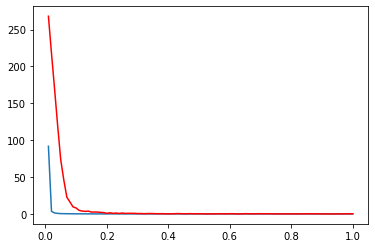

In [18]:
hist_nircam,edges=np.histogram(test,bins=100,density=True,range=(0,1))
plt.plot(edges[1:],hist_nircam)
plt.plot(edges[1:],hist,color='red')

In [ ]:
classified = Classifier.classify(h=image_electrons, j=image_electrons, v=image_electrons, z=image_electrons)

classifying:   0%|                                                                                                                                   | 0/51897 [00:00<?, ?batch/s]/home/mhuertas/.local/lib/python3.8/site-packages/morpheus/core/unet.py:143: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  return LAYERS.batch_normalization(inputs, training=is_training, axis=axis)
/opt/python/python3.8/lib/python3.8/site-packages/keras/legacy_tf_layers/normalization.py:463: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
/home/mhuertas/.local/lib/python3.8/site-packages/morpheus/core/unet.py:162: UserWarning: `

INFO:tensorflow:Restoring parameters from /home/mhuertas/.local/lib/python3.8/site-packages/morpheus/core/model_weights/model-440


2022-06-25 17:18:40.222581: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11319 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:02:00.0, compute capability: 6.0
2022-06-25 17:18:40.223271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 11319 MB memory:  -> device: 1, name: Tesla P100-PCIE-12GB, pci bus id: 0000:83:00.0, compute capability: 6.0
2022-06-25 17:18:41.431846: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204
classifying:   1%|▊                                                                                                                     | 354/51897 [22:55<55:00:29,  3.84s/batch]

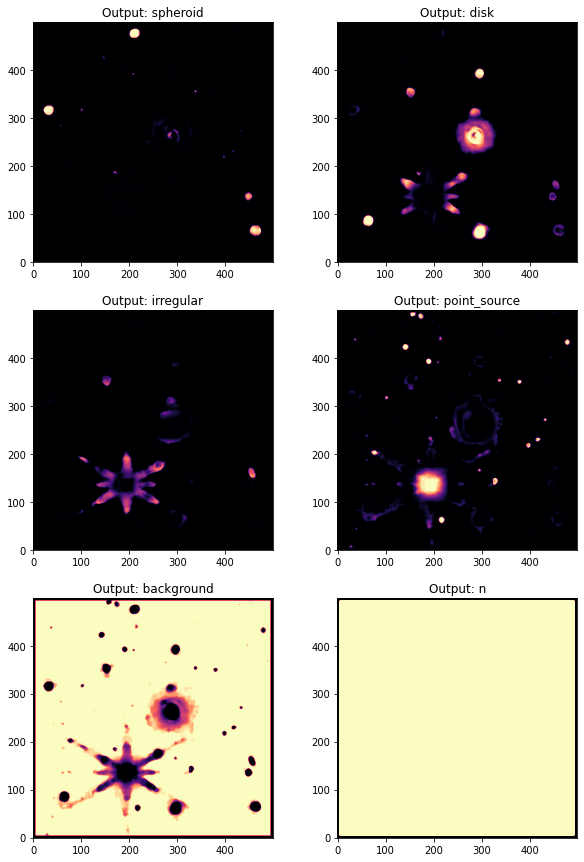

In [20]:
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = np.array(axes).flatten()

for i, k in enumerate(classified):
    axes[i].set_title(f'Output: {k}')
    axes[i].imshow(classified[k], origin='lower', vmin=0, vmax=1, cmap='magma')
plt.show()

In [23]:
# the mask tells the segmentation mapping algorithm to ignore
# the areas unclassified as a result of the windowing classification
# method used.
mask = np.zeros_like(test, np.int)
mask[5:-5, 5:-5] = 1

segmap = Classifier.segmap_from_classified(classified, test, mask=mask)

/tmp/ipykernel_29276/3722546792.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(test, np.int)


Building Markers...
Watershedding...


Deblending: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 383.90it/s]


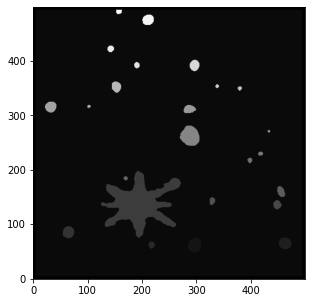

In [24]:
plt.figure(figsize=(5, 5))
plt.imshow(segmap, origin='lower', cmap='gray')
plt.show()

In [26]:
catalog = Classifier.catalog_from_classified(classified, test, segmap)

In [27]:
print('Source ID\tLocation(y,x)\tMorphology:[Sph,Dsk,Irr,Ps]')
for source in catalog:
    _id = source['id']
    loc = source['location']
    morph = np.round(source['morphology'], decimals=2) # round for readability
    print('{}\t\t{}\t{}'.format(_id, loc, morph))

Source ID	Location(y,x)	Morphology:[Sph,Dsk,Irr,Ps]
1		[61, 297]	[0. 1. 0. 0.]
2		[65, 463]	[0.9 0.1 0.  0. ]
3		[63, 218]	[0.   0.   0.01 0.99]
4		[85, 65]	[0.   0.99 0.   0.01]
5		[136, 195]	[0.   0.01 0.03 0.96]
6		[136, 449]	[0.75 0.23 0.01 0.01]
7		[144, 328]	[ 0.   -0.    0.05  0.95]
8		[161, 454]	[0.   0.34 0.65 0.01]
9		[185, 171]	[0.62 0.15 0.   0.24]
10		[218, 398]	[0.18 0.   0.   0.82]
11		[231, 418]	[0.07 0.   0.   0.93]
12		[262, 290]	[0.09 0.9  0.   0.  ]
13		[272, 433]	[0.09 0.   0.   0.91]
14		[309, 286]	[0.   0.73 0.26 0.  ]
15		[316, 33]	[0.98 0.01 0.   0.  ]
16		[317, 101]	[0.34 0.   0.   0.66]
17		[352, 153]	[0.   0.62 0.36 0.02]
18		[350, 379]	[0.01 0.   0.   0.99]
19		[354, 338]	[0.44 0.   0.   0.56]
20		[392, 297]	[0.   0.97 0.02 0.01]
21		[393, 191]	[ 0. -0.  0.  1.]
22		[423, 142]	[0.01 0.   0.   0.99]
23		[475, 211]	[1. 0. 0. 0.]
24		[491, 156]	[0. 0. 0. 1.]
